<a href="https://www.kaggle.com/code/notsau/credit-giving-classification?scriptVersionId=161459631" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Kredi Ver/Verme Classification

In [18]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
#!pip install pycaret

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/kaggle/input/loanssss/LoansTrainingSet.csv",low_memory=False)

# EDA

In [4]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [5]:
df = df.drop_duplicates()
#tekrarlanan satırları kaldırır

In [6]:
df["Purpose"].value_counts()

Debt Consolidation      190656
Home Improvements        14106
other                    13221
Other                     9115
Business Loan             4275
Buy a Car                 3150
Medical Bills             2686
Take a Trip               1467
Buy House                 1445
Educational Expenses       252
Name: Purpose, dtype: int64

In [7]:
df["Monthly Debt"].value_counts()

$0.00         241
$847.85        12
$838.10        12
$636.87        11
$837.00        11
             ... 
$3,097.91       1
$2,068.23       1
$347.17         1
$1,405.80       1
$2,525.82       1
Name: Monthly Debt, Length: 129115, dtype: int64

In [8]:
df.shape

(240373, 19)

In [9]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     59346
Years in current job             10444
Home Ownership                       0
Annual Income                    59346
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    131427
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       492
Tax Liens                           23
dtype: int64

In [10]:
df["Home Ownership"].value_counts()

Home Mortgage    117231
Rent             101208
Own Home          21389
HaveMortgage        545
Name: Home Ownership, dtype: int64

## Feature Engineering

In [11]:
del df["Purpose"]

In [12]:
df['Monthly Debt'] = df['Monthly Debt'].replace("\$", '', regex=True)

In [13]:
df['Home Ownership'] = df['Home Ownership'].replace("HaveMortgage", 'Home Mortgage', regex=True)
df['Home Ownership'] = df['Home Ownership'].replace("Home Mortgage", '0', regex=True)
df['Home Ownership'] = df['Home Ownership'].replace("Rent", '1', regex=True)
df['Home Ownership'] = df['Home Ownership'].replace("Own Home", '2', regex=True)

In [14]:
df['Years in current job'] = df['Years in current job'].replace("years", '', regex=True)
df['Years in current job'] = df['Years in current job'].replace("year", '', regex=True)

df['Years in current job'] = df['Years in current job'].replace("< 1", '0.5', regex=True)
df['Years in current job'] = df['Years in current job'].replace("10\+", '20', regex=True)
df['Years in current job'] = df['Years in current job'].replace(" ", '', regex=True)

In [15]:
df["Loan Status"]=df["Loan Status"].map({"Fully Paid":1,"Charged Off":0})
df["Term"]=df["Term"].map({"Long Term":1,"Short Term":0})

In [16]:
df=df.fillna(0)

In [17]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,0,741.0,20,0,33694.0,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,0,734.0,4,0,42269.0,"1,106.04",26.3,0.0,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,0,747.0,20,0,90126.0,"1,321.85",28.8,0.0,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,0,747.0,20,2,38072.0,751.92,26.2,0.0,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,0,746.0,4,1,50025.0,355.18,11.5,0.0,12,0,17391,37081,0.0,0.0


## Classification AutoML

In [18]:
from pycaret.classification import*

In [19]:
setup(df,target="Loan Status")

,Description,Value
0,Session id,634
1,Target,Loan Status
2,Target type,Binary
3,Original data shape,"(240373, 18)"
4,Transformed data shape,"(240373, 31)"
5,Transformed train set shape,"(168261, 31)"
6,Transformed test set shape,"(72112, 31)"
7,Numeric features,11
8,Categorical features,6
9,Preprocess,True


In [ ]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:00:20
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [20]:
best_model=create_model("et")
#en iyi modelin lda olduğunu gördük ve onu tekrar çalıştırdık

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8651,0.8125,1.0000,0.8446,0.9157,0.5894,0.6464
1,0.8600,0.8366,1.0000,0.8396,0.9128,0.5708,0.6319
2,0.8659,0.8092,1.0000,0.8453,0.9162,0.5922,0.6486
3,0.8616,0.8543,1.0000,0.8412,0.9137,0.5766,0.6365
4,0.8620,0.8386,1.0000,0.8416,0.9140,0.5782,0.6377
5,0.8635,0.7991,1.0000,0.8431,0.9148,0.5838,0.6421
6,0.8627,0.8253,1.0000,0.8422,0.9144,0.5808,0.6397
7,0.8588,0.8406,1.0000,0.8385,0.9121,0.5663,0.6285
8,0.8646,0.8493,1.0000,0.8441,0.9155,0.5876,0.6450


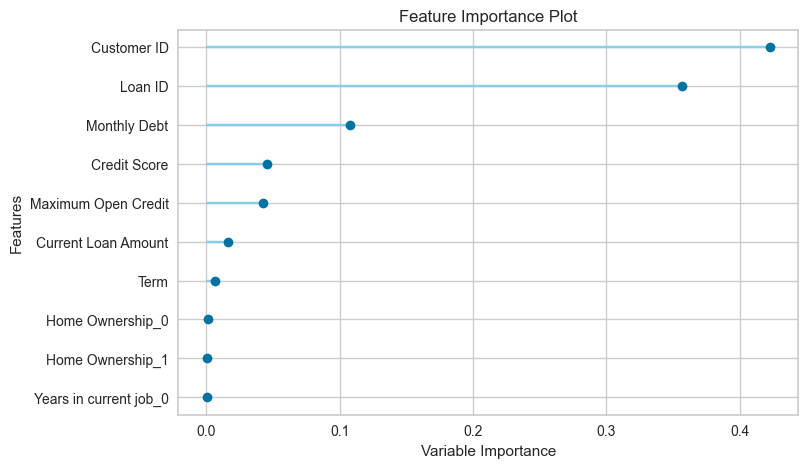

In [21]:
plot_model(best_model,plot="feature")
#sütunların ne kadar etkili olduğunu gösteren grafik